In [5]:
import tensorflow as tf
import numpy as np

encoder = tf.keras.models.load_model("../Models/ae_encoder_mixed.keras")
X = np.load("../Data/LPS/sal-lps-150-1500(labeled)_fulltest_data.npy")
Y = np.load("../Data/LPS/sal-lps-150-1500(labeled)_fulltest_labels.npy")
X = encoder.predict(X)

2025-09-18 14:07:44.631752: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 1349980000 exceeds 10% of free system memory.


103/103 ━━━━━━━━━━━━━━━━━━━━ 15s 119ms/step


In [7]:
X.shape

(3276, 500)

In [16]:
classifier = tf.keras.models.load_model("../Models/AE_Classifier_Only.keras")
y_pred_probs = classifier(X)
y_pred = np.argmax(y_pred_probs,axis=1)
print(y_pred.shape)



(3276,)


TN: 912, FP: 724, FN: 181, TP: 1459
AUC: 0.8546147280696523


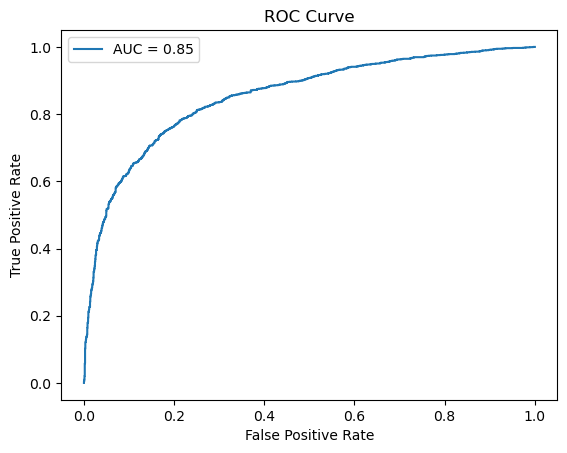

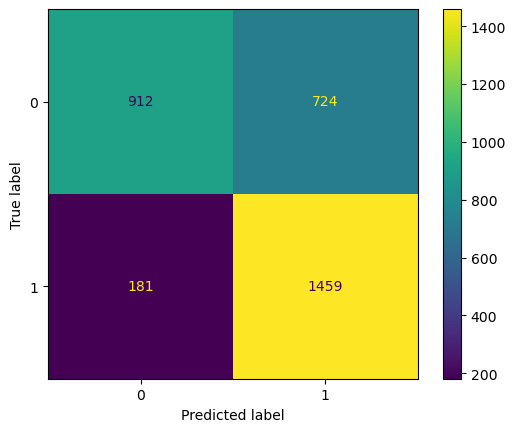

Test Accuracy: 0.7237


In [18]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay

cm = confusion_matrix(Y, y_pred)
tn, fp, fn, tp = cm.ravel()
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

if len(np.unique(Y)) == 2:
    auc = roc_auc_score(Y, y_pred_probs[:, 1])
    print(f'AUC: {auc}')
    fpr, tpr, thresholds = roc_curve(Y, y_pred_probs[:, 1])
    import matplotlib.pyplot as plt
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

# Confusion matrix plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
# print(f'Test loss: {loss}')
accuracy = np.mean(y_pred == Y)
print(f'Test Accuracy: {accuracy:.4f}')